## Getting Univers installed  
* required for USGS reports (see: http://internal.usgs.gov/publishing/toolboxes/illustrations/standards_guide.pdf)
* can be downloaded here: <http://bwtst.usgs.gov/apps/fonts/vid/otf.html>
* Windows instructions are included above; on Mac, simply right-click on font files and choose *Open With > Font Book*

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

% matplotlib inline

In [2]:
print('matplotlib version: {}\npython version: {}'.format(mpl.__version__, sys.version))

matplotlib version: 1.5.3
python version: 3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


### Delete the font cache
when new fonts are installed, the ``matplotlib`` font cache needs to be deleted. It will rebuild itself afterwards on import, including the new fonts that were installed. Eventually the developers plan to resolve this issue by using the OS to find fonts: <https://github.com/matplotlib/matplotlib/issues/3590>

get the cache directory location:

In [3]:
mpl.get_cachedir()

'/Users/aleaf/.matplotlib'

delete all **.cache * files in this directory, which may include:  

**fontList.cache, fontManager.cache, ttffont.cache, fontList.py3k.cache, tex.cache**

### check for Univers in the system fonts  
if the font cache hasn't been cleared, it'll show up here, but matplotlib won't be able to find it

In [4]:
import matplotlib.font_manager as fm 
univers_fonts = [f for f in fm.findSystemFonts(fontpaths=None, fontext='ttf') if 'univers' in f.lower()]
univers_fonts

/Users/aleaf/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['/Users/aleaf/Library/Fonts/Univers-CondensedBold.otf',
 '/Users/aleaf/Library/Fonts/Univers-CondensedOblique.otf',
 '/Users/aleaf/Library/Fonts/Univers-CondensedLightOblique.otf',
 '/Users/aleaf/Library/Fonts/Univers-Condensed.otf',
 '/Users/aleaf/Library/Fonts/Univers-CondensedLight.otf',
 '/Users/aleaf/Library/Fonts/Univers-CondensedBoldOblique.otf']

### Get the univers names

In [5]:
univers_names = [fm.FontProperties(fname=f).get_name() for f in univers_fonts]
univers_names

['Univers 67 Condensed',
 'Univers 57 Condensed',
 'Univers 47 Condensed Light',
 'Univers 57 Condensed',
 'Univers 47 Condensed Light',
 'Univers 67 Condensed']

### verify that matplotlib can find them

In [6]:
fm.findfont('Univers 67 Condensed')

'/Users/aleaf/Library/Fonts/Univers-CondensedBold.otf'

### make a plot using Univers  

note: as of 9/28/2016, with ``matplotlib 1.5.3`` and a relatively new install of Anaconda, the cell below resulted in `RuntimeError: TrueType font is missing table`.

This was apparently due to the fonttype for the PDF being set to 3 instead of 42.
Updating the rcParams dict resolves it (for a more permanent fix, you could edit the rcParams file)

In [8]:
plt.rcParams['pdf.fonttype']

3

In [9]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.fonttype']

42

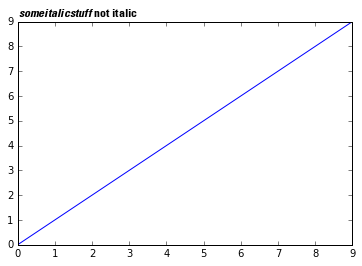

In [10]:
fig, ax = plt.subplots()
plt.plot(range(10), range(10))

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Univers 67 Condensed:italic'

ax.set_title('$\it{someitalicstuff}$ not italic', fontname='Univers 67 Condensed' , loc='left')
plt.savefig('junk.pdf')